In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r"DEXINUS (1).xls")

In [3]:
df

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [4]:
# creating copy of data Frame 
data=df.copy()

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  12649 non-null  datetime64[ns]
 1   DEXINUS           12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [7]:
df.corr()

,DEXINUS
DEXINUS,1.0


###### it shows that there is no any correlation beetween dependent and independent variable

<AxesSubplot:>

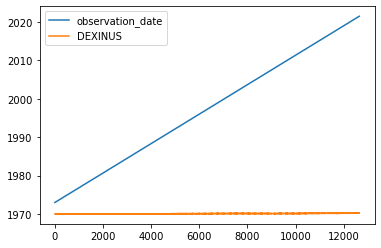

In [8]:
df.plot()

In [9]:
# finding null value
df.isnull().sum()

observation_date      0
DEXINUS             494
dtype: int64

In [10]:
# filling null value by privious row
df.fillna(method='ffill', inplace=True)

In [11]:
df.isnull().sum()

observation_date    0
DEXINUS             0
dtype: int64

In [12]:
# cheacking duplicated value in data frame
df.duplicated().sum()

0

# EDA and Visuilization

<AxesSubplot:xlabel='DEXINUS', ylabel='observation_date'>

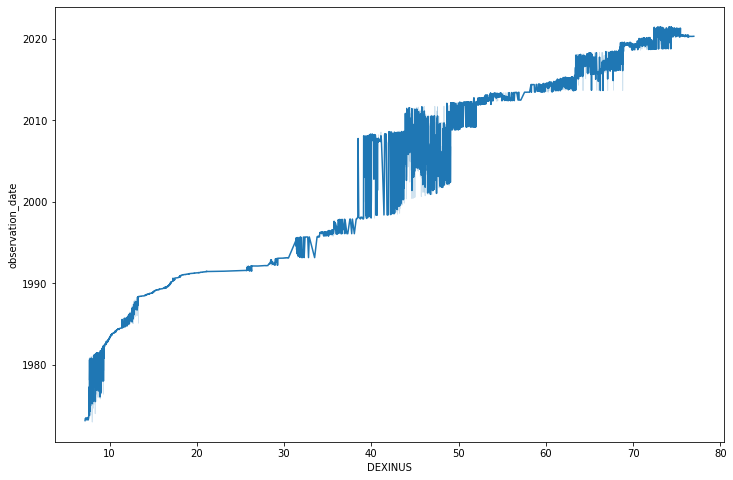

In [13]:
plt.figure(figsize=(12,8))
sns.lineplot(x=df.DEXINUS,y=df.observation_date,data=df)

<AxesSubplot:ylabel='Count'>

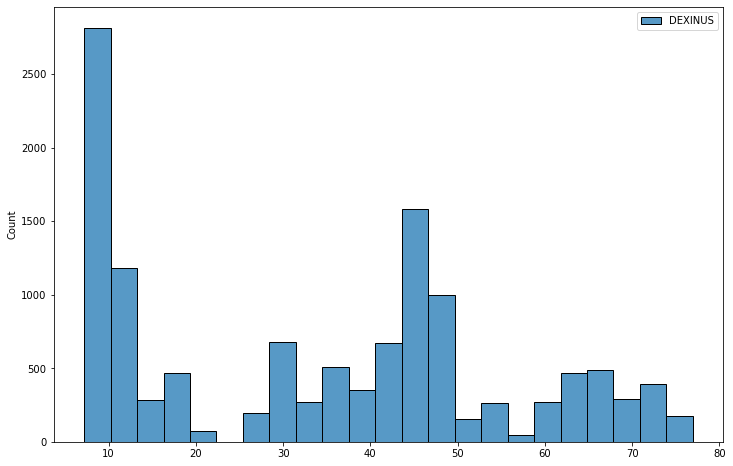

In [14]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,color='pink')

<AxesSubplot:ylabel='Density'>

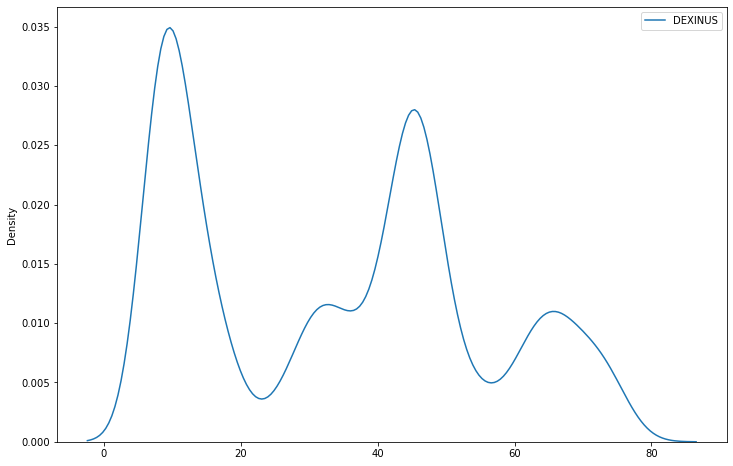

In [15]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df,color='red')

# Decomposing Data

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plot

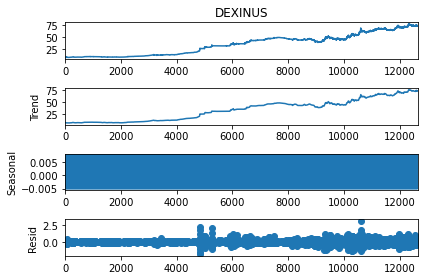

<Figure size 864x360 with 0 Axes>

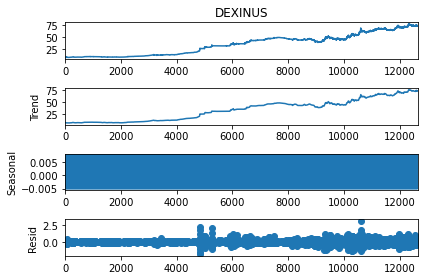

In [17]:
plt.figure(figsize=(12,5))
decompose_ts=seasonal_decompose(df['DEXINUS'],period=12)
decompose_ts.plot()

# Autocorreltion and Partialcorrelation

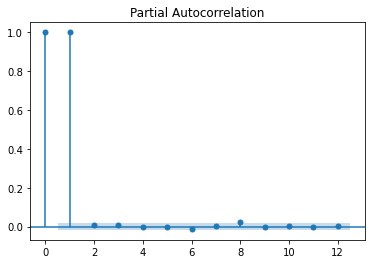

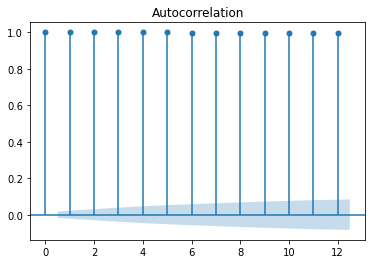

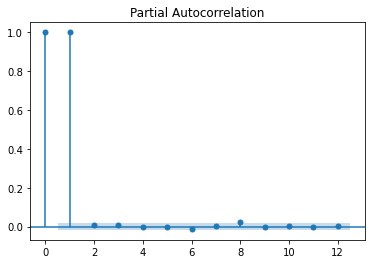

In [18]:
    tsa_plot.plot_acf(df['DEXINUS'],lags=12)
    tsa_plot.plot_pacf(df['DEXINUS'],lags=12)

# spliting the data into train and test Part

In [19]:
train_df=df.iloc[:12529]
test_df=df.iloc[12529:]

In [20]:
test_df.value_counts().sum()

120

In [21]:
train_df.value_counts().sum()

12529

# Smoothing Exponential Model

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [23]:
model_1=ExponentialSmoothing(train_df.DEXINUS,trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [24]:
prediction_1=model_1.predict(120)

In [25]:
prediction_1.value_counts().sum()

12409

<AxesSubplot:>

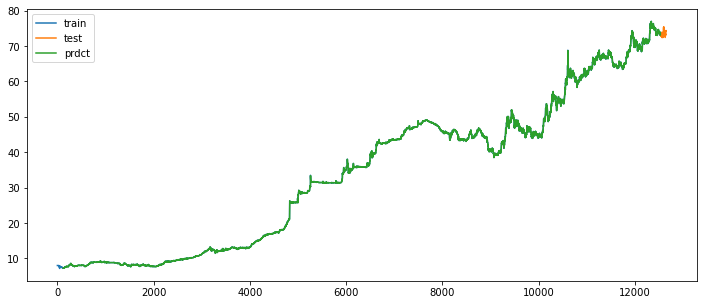

In [26]:
train_df.DEXINUS.plot(label="train",legend=True)
test_df.DEXINUS.plot(label='test',legend=True,figsize=(12,5))
prediction_1.plot(label='prdct',legend=True)


In [27]:
# final exponential model
model_final=ExponentialSmoothing(df.DEXINUS,trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [28]:
prdct_final=model_final.predict(30)

In [29]:
prdct_final

30        8.010702
31        8.011203
32        8.014437
33        7.595786
34        7.581717
           ...    
12644    74.180670
12645    74.179435
12646    74.374242
12647    74.142389
12648    74.148765
Length: 12619, dtype: float64

<AxesSubplot:>

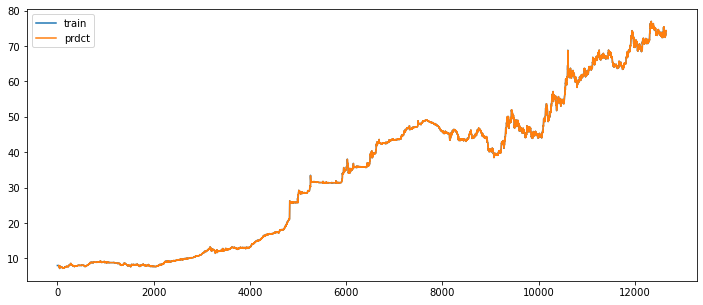

In [30]:
df.DEXINUS.plot(label="train",legend=True)
prdct_final.plot(label='prdct',legend=True,figsize=(12,5))

<AxesSubplot:>

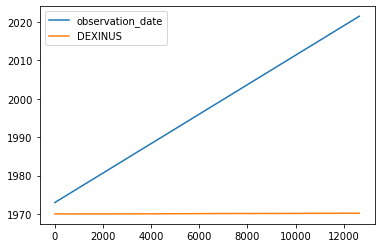

In [31]:
%matplotlib inline
df.plot()

# AR MODEL

In [32]:
# cheacking staionarity of data

In [33]:
    from statsmodels.tsa.stattools import adfuller

In [34]:
adfuller(df.DEXINUS)

(0.6320006223926234,
 0.9883783969303007,
 37,
 12611,
 {'1%': -3.4308686449575485,
  '5%': -2.8617692154460714,
  '10%': -2.56689200640251},
 -8076.628404652423)

In [35]:
# llr test
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [36]:
from statsmodels.tsa.arima_model import ARMA
model_ar1 = ARMA(df.DEXINUS, order = (1,0))

In [37]:
results_ar1 = model_ar1.fit(disp = 0)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [38]:
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                DEXINUS   No. Observations:                12649
Model:                     ARMA(1, 0)   Log Likelihood                4000.764
Method:                       css-mle   S.D. of innovations              0.176
Date:                Sun, 08 Aug 2021   AIC                          -7995.527
Time:                        00:52:47   BIC                          -7973.191
Sample:                             0   HQIC                         -7988.054
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           418.5907        nan        nan        nan         nan         nan
ar.L1.DEXINUS     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [39]:
#Higher-Lag AR Models for Returns
model_ar2 = ARMA(df.DEXINUS, order = (1,0))

In [40]:
results_ar2 = model_ar2.fit(disp = 0)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [41]:
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                DEXINUS   No. Observations:                12649
Model:                     ARMA(1, 0)   Log Likelihood                4000.764
Method:                       css-mle   S.D. of innovations              0.176
Date:                Sun, 08 Aug 2021   AIC                          -7995.527
Time:                        00:52:48   BIC                          -7973.191
Sample:                             0   HQIC                         -7988.054
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           418.5907        nan        nan        nan         nan         nan
ar.L1.DEXINUS     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
LLR_test(model_ar1, model_ar2)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


1.0

In [43]:
prdct_ar=results_ar1.predict(start=len(train_df), end=len(train_df)+len(test_df)-1,dynamic=False)

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("root mean square eror------------->",mean_squared_error(test_df.DEXINUS, prdct_ar))

root mean square eror-------------> 0.0619619836271968


In [45]:
e=pd.DataFrame({'test':test_df.DEXINUS,'prediction':prdct_ar})
e

,test,prediction
12529,73.50,73.310037
12530,73.26,73.500037
12531,73.07,73.260037
12532,73.11,73.070037
12533,73.08,73.110037
...,...,...
12644,74.18,74.140037
12645,74.37,74.180037
12646,74.13,74.370037
12647,74.14,74.130037


<AxesSubplot:>

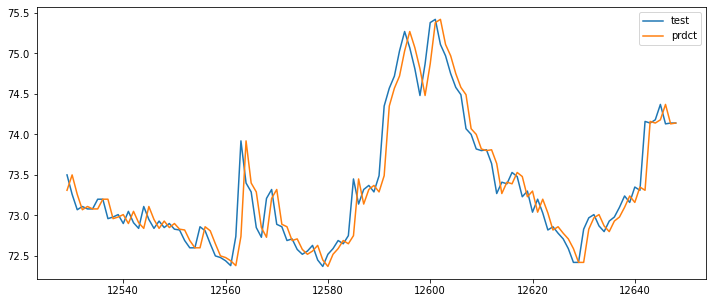

In [46]:
#train_df.DEXINUS.plot(legend=True,label="tran")
test_df.DEXINUS.plot(legend=True,label="test")
prdct_ar.plot(legend=True,label="prdct",figsize=(12,5))

In [47]:
# Future data
future_dates = pd.date_range(start = df.observation_date.max() + pd.DateOffset(1), end = df.observation_date.max() + pd.DateOffset(30), freq = 'D')
future_df = pd.DataFrame()
future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]
future_df['Day'] = [i.day for i in future_dates]

In [48]:
future_dates

DatetimeIndex(['2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03',
               '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19',
               '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23',
               '2021-07-24', '2021-07-25'],
              dtype='datetime64[ns]', freq='D')

In [49]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [50]:
future_dates_df

,observation_date,DEXINUS
2021-06-27,NaN,NaN
2021-06-28,NaN,NaN
2021-06-29,NaN,NaN
2021-06-30,NaN,NaN
2021-07-01,NaN,NaN
2021-07-02,NaN,NaN
2021-07-03,NaN,NaN
2021-07-04,NaN,NaN
2021-07-05,NaN,NaN
2021-07-06,NaN,NaN


In [51]:
df_future=pd.concat([df,future_dates_df])
len(df_future)

12678

In [52]:
df.tail()

,observation_date,DEXINUS
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [53]:
prdct_future=results_ar1.predict(start=12649, end=len(df_future)+1,dynamic=False)

<AxesSubplot:>

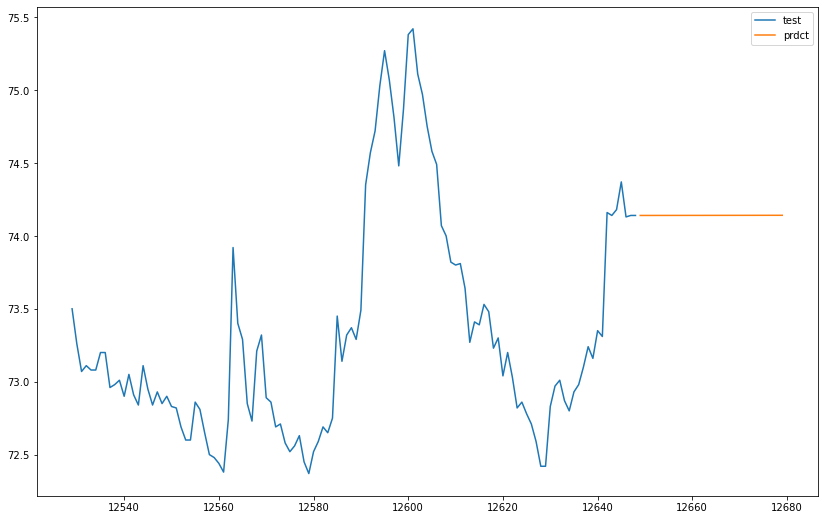

In [54]:
#train_df.DEXINUS.plot(legend=True,label="Train")
test_df.DEXINUS.plot(legend=True,label="test",figsize=(14,9))
prdct_future.plot(legend=True,label='prdct')

# Forecasting Using FbProphet

In [55]:
#pip install pystan==2.19.1.1

In [56]:
#conda install -c conda-forge fbprophet

In [57]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [58]:
df.columns=["ds",'y']

In [59]:
df

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      12649 non-null  datetime64[ns]
 1   y       12649 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [61]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [62]:
model_prophet_1=Prophet()

In [63]:
model_prophet_1.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [64]:
# future data
future_df_123= model_prophet_1.make_future_dataframe(periods=30)

In [65]:
future_df_123

,ds
0,1973-01-02
1,1973-01-03
2,1973-01-04
3,1973-01-05
4,1973-01-08
...,...
12674,2021-07-21
12675,2021-07-22
12676,2021-07-23
12677,2021-07-24


In [66]:
future_df_123.tail()

,ds
12674,2021-07-21
12675,2021-07-22
12676,2021-07-23
12677,2021-07-24
12678,2021-07-25


In [67]:
prophet_forcast=model_prophet_1.predict(future_df_123)

In [68]:
prophet_forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1973-01-02,7.546497,5.352013,9.758378,7.546497,7.546497,-0.047609,-0.047609,-0.047609,-0.084883,-0.084883,-0.084883,0.037275,0.037275,0.037275,0.0,0.0,0.0,7.498888
1,1973-01-03,7.547704,5.322070,9.683728,7.547704,7.547704,-0.057119,-0.057119,-0.057119,-0.089867,-0.089867,-0.089867,0.032748,0.032748,0.032748,0.0,0.0,0.0,7.490585
2,1973-01-04,7.548910,5.278893,9.645715,7.548910,7.548910,-0.062624,-0.062624,-0.062624,-0.090539,-0.090539,-0.090539,0.027915,0.027915,0.027915,0.0,0.0,0.0,7.486286
3,1973-01-05,7.550117,5.328640,9.757336,7.550117,7.550117,-0.078863,-0.078863,-0.078863,-0.101638,-0.101638,-0.101638,0.022776,0.022776,0.022776,0.0,0.0,0.0,7.471254
4,1973-01-08,7.553737,5.262689,9.681952,7.553737,7.553737,-0.085376,-0.085376,-0.085376,-0.091060,-0.091060,-0.091060,0.005684,0.005684,0.005684,0.0,0.0,0.0,7.468360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12674,2021-07-21,76.752467,74.251343,78.751112,76.752467,76.752467,-0.121523,-0.121523,-0.121523,-0.089867,-0.089867,-0.089867,-0.031656,-0.031656,-0.031656,0.0,0.0,0.0,76.630944
12675,2021-07-22,76.759277,74.444306,78.996770,76.759277,76.759277,-0.126737,-0.126737,-0.126737,-0.090539,-0.090539,-0.090539,-0.036198,-0.036198,-0.036198,0.0,0.0,0.0,76.632539
12676,2021-07-23,76.766087,74.390689,78.916619,76.766087,76.766087,-0.141421,-0.141421,-0.141421,-0.101638,-0.101638,-0.101638,-0.039783,-0.039783,-0.039783,0.0,0.0,0.0,76.624665
12677,2021-07-24,76.772896,74.543198,79.138283,76.772896,76.772896,0.186668,0.186668,0.186668,0.228994,0.228994,0.228994,-0.042326,-0.042326,-0.042326,0.0,0.0,0.0,76.959564


<AxesSubplot:>

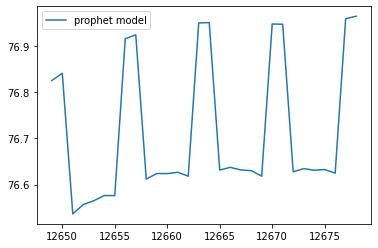

In [69]:
prophet_forcast.yhat[12649:].plot(legend=True,label='prophet model')

In [70]:
prophet_forcast.yhat[12649:]

12649    76.825446
12650    76.841265
12651    76.536263
12652    76.556595
12653    76.564764
12654    76.576145
12655    76.575930
12656    76.916226
12657    76.924641
12658    76.611752
12659    76.623860
12660    76.623622
12661    76.626574
12662    76.618066
12663    76.950364
12664    76.951230
12665    76.631381
12666    76.637252
12667    76.631613
12668    76.630101
12669    76.618143
12670    76.948064
12671    76.947662
12672    76.627671
12673    76.634518
12674    76.630944
12675    76.632539
12676    76.624665
12677    76.959564
12678    76.964937
Name: yhat, dtype: float64

In [71]:
data.isnull().sum()

observation_date      0
DEXINUS             494
dtype: int64

In [72]:
data.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [73]:
data['month']=data.observation_date.dt.strftime("%b")
data['year']=data.observation_date.dt.strftime("%y")

In [74]:
data

,observation_date,DEXINUS,month,year
0,1973-01-02,8.02,Jan,73
1,1973-01-03,8.02,Jan,73
2,1973-01-04,8.00,Jan,73
3,1973-01-05,8.01,Jan,73
4,1973-01-08,8.00,Jan,73
...,...,...,...,...
12644,2021-06-21,74.18,Jun,21
12645,2021-06-22,74.37,Jun,21
12646,2021-06-23,74.13,Jun,21
12647,2021-06-24,74.14,Jun,21


In [75]:
data['t']=np.arange(1,len(data)+1)
data['t_sqrt']=data['t']**2
data['log_DEXINUS']=np.log(data['DEXINUS'])
data.head(10)

,observation_date,DEXINUS,month,year,t,t_sqrt,log_DEXINUS
0,1973-01-02,8.02,Jan,73,1,1,2.081938
1,1973-01-03,8.02,Jan,73,2,4,2.081938
2,1973-01-04,8.00,Jan,73,3,9,2.079442
3,1973-01-05,8.01,Jan,73,4,16,2.080691
4,1973-01-08,8.00,Jan,73,5,25,2.079442
5,1973-01-09,8.00,Jan,73,6,36,2.079442
6,1973-01-10,8.00,Jan,73,7,49,2.079442
7,1973-01-11,8.00,Jan,73,8,64,2.079442
8,1973-01-12,8.00,Jan,73,9,81,2.079442
9,1973-01-15,8.00,Jan,73,10,100,2.079442


In [83]:
# genrating dummies for month
month_dummies=pd.DataFrame(pd.get_dummies(data['month']))
data=pd.concat([data,month_dummies],axis=1)
data.head()

,observation_date,DEXINUS,month,year,t,t_sqrt,log_DEXINUS,Apr,Aug,Dec,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1973-01-02,8.02,Jan,73,1,1,2.081938,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1973-01-03,8.02,Jan,73,2,4,2.081938,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1973-01-04,8.00,Jan,73,3,9,2.079442,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1973-01-05,8.01,Jan,73,4,16,2.080691,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1973-01-08,8.00,Jan,73,5,25,2.079442,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [85]:
# filling null value by privious row
data.fillna(method='ffill', inplace=True)

In [86]:
# splitting data into train and test part
train_data=data.iloc[:12529]
test_data=data.iloc[12529:]

In [87]:
# Linear model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
linear_model=smf.ols('DEXINUS~t',data=train_data).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
a = mean_squared_error(test_data['DEXINUS'], pred_linear, squared=False)

In [88]:
a

4.124510985537938

In [89]:
#Exponential
Exp = smf.ols('log_DEXINUS~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Expt = mean_squared_error(test_data.DEXINUS, pred_Exp, squared=False)
rmse_Expt

68.75882470127235

In [90]:
#Quadratic 
Quad = smf.ols('DEXINUS~t+t_sqrt',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_sqrt"]]))
rmse_Quad = mean_squared_error(test_data.DEXINUS,pred_Quad, squared=False)
rmse_Quad

0.7857357458398987

In [91]:
#Additive seasonality 
add_sea = smf.ols('DEXINUS~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = mean_squared_error(test_data.DEXINUS,pred_add_sea, squared=False)
rmse_add_sea

39.965244518567324

In [92]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('DEXINUS~t+t_sqrt+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sqrt']]))
rmse_add_sea_quad = mean_squared_error(test_data.DEXINUS,pred_add_sea_quad, squared=False)
rmse_add_sea_quad

0.8781536385733479

In [93]:
#Multiplicative Seasonality
Mul_sea = smf.ols('DEXINUS~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = mean_squared_error(test_data.DEXINUS,pred_Mult_sea, squared=False)
rmse_Mult_sea

39.965244518567324

In [94]:
# RMSE value for all model based forcasting models
d={"Linear model": a,
   "Exponential" : rmse_Expt,
   "Quadratic": rmse_Quad,
   "Additive seasonality": rmse_add_sea,
   "Additive Seasonality Quadratic ": rmse_add_sea_quad,
   "Multiplicative Seasonality" : rmse_Mult_sea
   
    
}

In [95]:
table_1=pd.DataFrame(list(d.items()),columns = ['models','rmse'])

In [96]:
table_1

,models,rmse
0,Linear model,4.124511
1,Exponential,68.758825
2,Quadratic,0.785736
3,Additive seasonality,39.965245
4,Additive Seasonality Quadratic,0.878154
5,Multiplicative Seasonality,39.965245


###### whichever model will have samllest rmse value ,is good model . according to above Quadratic and Additive Seasonality Quadratic is good model

In [97]:
l=future_df_123.copy()
l['t']=np.arange(1,len(l)+1)
l['t_sqrt']=l['t']**2

In [98]:
l

,ds,t,t_sqrt
0,1973-01-02,1,1
1,1973-01-03,2,4
2,1973-01-04,3,9
3,1973-01-05,4,16
4,1973-01-08,5,25
...,...,...,...
12674,2021-07-21,12675,160655625
12675,2021-07-22,12676,160680976
12676,2021-07-23,12677,160706329
12677,2021-07-24,12678,160731684


In [99]:
quad_final_prdct=Quad.predict(l[["t","t_sqrt"]])

In [100]:
quad_final_prdct

0         2.377495
1         2.381356
2         2.385218
3         2.389080
4         2.392942
           ...    
12674    73.631357
12675    73.638740
12676    73.646124
12677    73.653508
12678    73.660892
Length: 12679, dtype: float64

# 30 days Prediction of all models

In [101]:
# prediction value of AR MODEL
prdct_future

12649    74.140037
12650    74.140074
12651    74.140111
12652    74.140148
12653    74.140185
12654    74.140221
12655    74.140258
12656    74.140295
12657    74.140332
12658    74.140369
12659    74.140406
12660    74.140443
12661    74.140480
12662    74.140517
12663    74.140554
12664    74.140590
12665    74.140627
12666    74.140664
12667    74.140701
12668    74.140738
12669    74.140775
12670    74.140812
12671    74.140849
12672    74.140886
12673    74.140923
12674    74.140959
12675    74.140996
12676    74.141033
12677    74.141070
12678    74.141107
12679    74.141144
dtype: float64

In [102]:
# prophet model
prophet_forcast.yhat[12649:]

12649    76.825446
12650    76.841265
12651    76.536263
12652    76.556595
12653    76.564764
12654    76.576145
12655    76.575930
12656    76.916226
12657    76.924641
12658    76.611752
12659    76.623860
12660    76.623622
12661    76.626574
12662    76.618066
12663    76.950364
12664    76.951230
12665    76.631381
12666    76.637252
12667    76.631613
12668    76.630101
12669    76.618143
12670    76.948064
12671    76.947662
12672    76.627671
12673    76.634518
12674    76.630944
12675    76.632539
12676    76.624665
12677    76.959564
12678    76.964937
Name: yhat, dtype: float64

In [103]:
prophet_forcast.yhat.head()

0    7.498888
1    7.490585
2    7.486286
3    7.471254
4    7.468360
Name: yhat, dtype: float64